In [1]:
import numpy as np
import geopandas as gpd

from glob import glob
import matplotlib.pyplot as plt

In [16]:
geodir = '/Users/michael/code/nbm-verify/forecast-zones/'
zones_shapefile = glob(geodir + '*.shp')[0]

# Read the shapefile
zones = gpd.read_file(zones_shapefile)

In [17]:
# Prune to Western Region using TZ
zones = zones.set_index('TIME_ZONE').loc[['M', 'Mm', 'm', 'MP', 'P']].reset_index()
zones

,TIME_ZONE,STATE,CWA,FE_AREA,ZONE,NAME,STATE_ZONE,LON,LAT,SHORTNAME,InPoly_FID,SimPgnFlag,MaxSimpTol,MinSimpTol,geometry
0,M,KS,GLD,wc,027,Wallace,KS027,-101.7636,38.9166,Wallace,140,0,0.0001,0.0001,"POLYGON ((-101.47860 39.13471, -101.47820 39.1..."
1,M,CO,PUB,cc,059,Leadville Vicinity/Lake County Below 11000 Ft,CO059,-106.3446,39.1873,Leadville Vicinity/Lake County B,168,0,0.0001,0.0001,"POLYGON ((-106.29179 39.35181, -106.28989 39.3..."
2,M,CO,PUB,cc,065,Saguache County East of Continental Divide bel...,CO065,-106.3423,38.1071,Saquache County East of Continen,169,0,0.0001,0.0001,"POLYGON ((-106.26640 38.42301, -106.24979 38.3..."
3,M,CO,PUB,cc,069,Del Norte Vicinity/Northern San Luis Valley Be...,CO069,-106.0348,37.9152,Del Norte Vicinity/Northern San,170,0,0.0001,0.0001,"POLYGON ((-105.81470 38.17421, -105.79539 38.1..."
4,M,CO,PUB,sc,070,Alamosa Vicinity/Central San Luis Valley Belo...,CO070,-105.8929,37.5614,Alamosa Vicinity/Central San Lu,171,0,0.0001,0.0001,"POLYGON ((-105.57529 37.61371, -105.57529 37.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,P,CA,EKA,nw,107,Northern Trinity,CA107,-122.9759,40.9086,Northern Trinity,3865,0,0.0001,0.0001,"POLYGON ((-122.56878 41.36751, -122.56468 41.3..."
729,P,CA,EKA,nw,101,Coastal Del Norte,CA101,-124.1146,41.7364,Coastal Del Norte,3866,0,0.0001,0.0001,"POLYGON ((-124.13786 41.99716, -124.13471 41.9..."
730,P,CA,EKA,nw,102,Del Norte Interior,CA102,-123.8512,41.7446,Del Norte Interior,3867,0,0.0001,0.0001,"POLYGON ((-123.52009 42.00091, -123.51767 42.0..."
731,P,CA,EKA,nw,104,Southwestern Humboldt,CA104,-124.1428,40.2708,Southwestern Humboldt,3868,0,0.0001,0.0001,"POLYGON ((-124.20701 40.53001, -124.19107 40.5..."


In [24]:
for cwa in np.unique(zones['CWA']):
    print(cwa, len(np.unique(zones[zones['CWA'] == cwa]['ZONE'])))

ABQ 41
ABR 2
BIS 8
BOI 14
BOU 22
BYZ 31
CYS 28
DDC 1
EKA 15
EPZ 24
FGZ 19
GGW 16
GJT 26
GLD 7
HNX 21
LBF 9
LKN 11
LOX 22
MAF 6
MFR 17
MSO 11
MTR 16
OTX 18
PDT 21
PIH 25
PQR 23
PSR 41
PUB 39
REV 9
RIW 29
SEW 21
SGX 13
SLC 21
STO 12
TFX 20
TWC 15
UNR 27
VEF 22


(-125.98783687434998,
 -99.03214163864993,
 29.710239953550047,
 49.92108569545003)

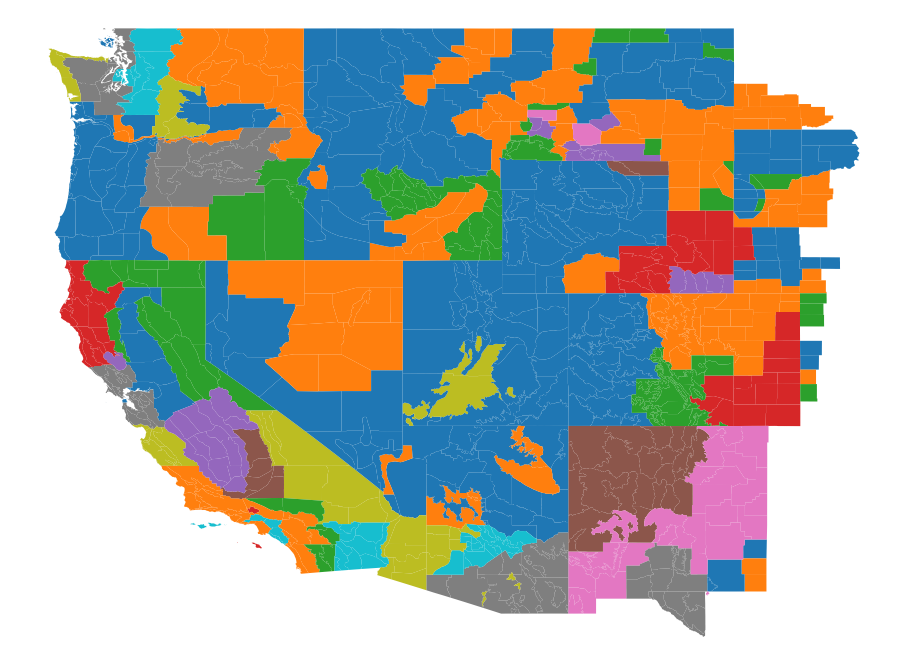

In [23]:
fig, ax = plt.subplots(1, figsize=(16, 12), facecolor='w')
zones.plot(column='ZONE', ax=ax)
ax.set_axis_off()
plt.axis('equal')